## Variáveis de entrada

Variáveis para avaliação do aplicativo uberEats

***Qualidade:*** Qualidade da comida<br/>
***Serviço:*** Qualidade do serviço de entrega

## Variável de saída

A variável de saída é simplesmente a quantidade de pontos, em pontos percentuais:

***Pontuação*** 

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

qual = np.arange(0, 11, 1)
serv = np.arange(0, 11, 1)
pts  = np.arange(0, 26, 1)

qual_ruim = fuzz.trimf(qual, [0, 0, 5])
qual_bom = fuzz.trimf(qual, [0, 5, 10])
qual_otimo = fuzz.trimf(qual, [5, 10, 10])

serv_baixoCusto = fuzz.trimf(serv, [0, 0, 5])
serv_acessivel = fuzz.trimf(serv, [0, 5, 10])
serv_caro = fuzz.trimf(serv, [5, 10, 10])

pts_baixo = fuzz.trimf(pts, [0, 0, 13])
pts_medio = fuzz.trimf(pts, [0, 13, 25])
pts_alto = fuzz.trimf(pts, [13, 25, 25])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(qual, qual_ruim, 'b', linewidth=1.5, label='Ruim')
ax0.plot(qual, qual_bom, 'g', linewidth=1.5, label='Bom')
ax0.plot(qual, qual_otimo, 'r', linewidth=1.5, label='Ótimo')
ax0.set_title('Qualidade da comida')
ax0.legend()

ax1.plot(serv, serv_baixoCusto, 'b', linewidth=1.5, label='Baixo custo')
ax1.plot(serv, serv_acessivel, 'g', linewidth=1.5, label='Acessível')
ax1.plot(serv, serv_caro, 'r', linewidth=1.5, label='Caro')
ax1.set_title('Qualidade do serviço - (uberEats)')
ax1.legend()

ax2.plot(pts, pts_baixo, 'b', linewidth=1.5, label='Baixo')
ax2.plot(pts, pts_medio, 'g', linewidth=1.5, label='Medio')
ax2.plot(pts, pts_alto, 'r', linewidth=1.5, label='Alto')
ax2.set_title('Nível de pontuação')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Clustering

Above is our test data. We see three distinct blobs. However, what would happen if we didn’t know how many clusters we should expect? Perhaps if the data were not so clearly clustered?

Let’s try clustering our data several times, with between 2 and 9 clusters.
 

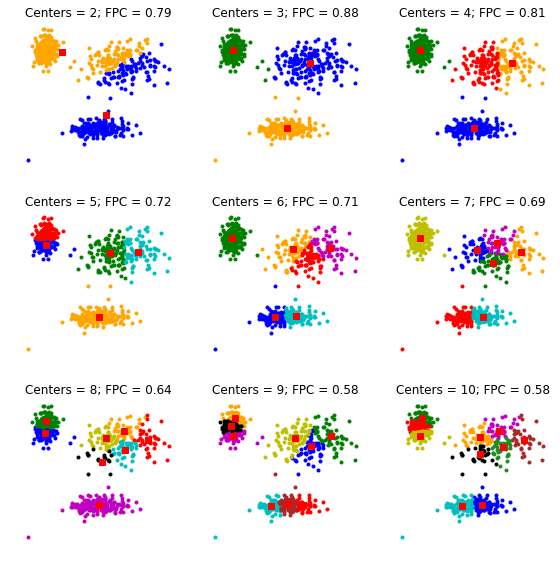

In [5]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

# The fuzzy partition coefficient (FPC)

Text(0,0.5,'Fuzzy partition coefficient')

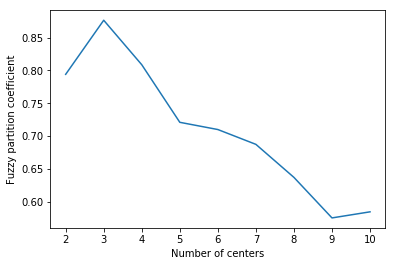

In [6]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")